Approach - Facial Recognition using trained celebrity model using MTCNN & Keras VGGface

1. Import celebrity faces dataset from Kaggle into Colab

2. Read & display image

3. Create bounding box function to identify face/s in an image

4. Create embedding function to extract features from a face in the bounding box using VGGface

5. Compare similarities of images by comparing cosine values from embeddings.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mtcnn
!pip install keras_vggface keras_applications

     |████████████████████████████████| 2.3 MB 5.0 MB/s 


In [ ]:
!pip install keras_vggface

In [ ]:
## make directory for kaggle in drive

!mkdir -p ~/.kaggle

In [ ]:
## Read & write permission for file owner

!cp /content/drive/'My Drive'/kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
3# Listing kaggle datasets that contain faces

!kaggle datasets list -s faces

ref                                                       title                                      size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/andrewmvd/animal-faces                           Animal Faces                              696MB  2020-05-22 06:49:01           5016        149  0.875            
datasets/ashwingupta3012/human-faces                      Human Faces                                 2GB  2020-09-21 04:09:12           4016         72  0.875            
datasets/soumikrakshit/anime-faces                        Anime Faces                               441MB  2019-05-16 10:38:47           6305        153  0.625            
datasets/kostastokis/simpsons-faces                       Simpsons Faces                            442MB  2018-09-28 17:38:04           629

In [ ]:
## download dataset

!kaggle datasets download -d dansbecker/5-celebrity-faces-dataset

  0% 0.00/5.03M [00:00<?, ?B/s]
100% 5.03M/5.03M [00:00<00:00, 56.5MB/s]


In [ ]:
##listing data

!ls

5-celebrity-faces-dataset.zip  drive  sample_data


In [ ]:
!unzip 5-celebrity-faces-dataset.zip

Archive:  5-celebrity-faces-dataset.zip
  inflating: data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg  
  inflating: data/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg  
  inflating: data/train/ben_afflek/httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg  
  inflating: data/train/ben_afflek/httptrwebimgacstanetcxbdddmediasnmediajpg.jpg  
  inflating: data/train/ben_afflek/httpwwwaceshowbizcomimagesphotobenaffleckjp

In [ ]:
## Error of importing mtcnn

from mtcnn.mtcnn import MTCNN
import cv2
import numpy as np

from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from keras.utils.layer_utils import get_source_inputs
from scipy.spatial.distance import cosine

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

ModuleNotFoundError: ignored

In [ ]:
! pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install keras_applications --no-deps
filename = "/usr/local/lib/python3.7/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))
import tensorflow as tf

from keras_vggface.vggface import VGGFace

vggface = VGGFace(model='resnet50') # or VGGFace() as default



  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-sygojx02
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-sygojx02
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8325 sha256=c2d3ec1be1a95ba4f2f5c88a5e4abbd53b77b081526f064fa38d48bf137eb3f5
  Stored in directory: /tmp/pip-ephem-wheel-cache-ns1buy5u/wheels/08/df/86/0225d44647ab2256dbf1e006823288fe9cc86367a056e6ea2c
Successfully built keras-vggface
     |████████████████████████████████| 50 kB 3.0 MB/s 
165453824/165439116 [==============================] - 1s 0us/step


In [ ]:
from mtcnn.mtcnn import MTCNN
import cv2
import numpy as np

from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from keras.utils.layer_utils import get_source_inputs
from scipy.spatial.distance import cosine

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
 ## reading an image

 image = cv2.imread('httpssmediacacheakpinimgcomxffabffabbbcfbceaedjpg.jpg ')

In [ ]:
## viewing image patch for colab

from google.colab.patches import cv2_imshow

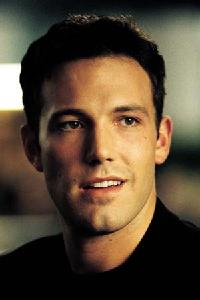

In [ ]:
image = cv2.imread('data/val/ben_afflek/httpabsolumentgratuitfreefrimagesbenaffleckjpg.jpg')
cv2_imshow(image)

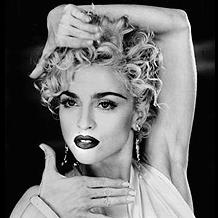

In [ ]:
image = cv2.imread('val/madonna/httpcdnfuncheapcomwpcontentuploadsVOGUEjpg.jpg')
cv2_imshow(image)

 

In [ ]:
## detect & extract face from image function
## pinpoints key facial feature with orange dots
detector = MTCNN()

faces = detector.detect_faces(image)
for face in faces:
  print(face)

{'box': [57, 65, 75, 107], 'confidence': 0.9980880618095398, 'keypoints': {'left_eye': (70, 103), 'right_eye': (105, 104), 'nose': (82, 123), 'mouth_left': (74, 143), 'mouth_right': (100, 143)}}


In [ ]:
## create bounding box function

def create_bbox(image):
  faces = detector.detect_faces(image)
  bounding_box = faces[0]['box']

  cv2.rectangle(image,
                (bounding_box[0], bounding_box[1]),
                (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),(0,155,255),2)

  return image   

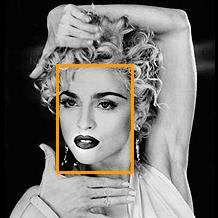

In [ ]:
cv2_imshow(create_bbox(image))

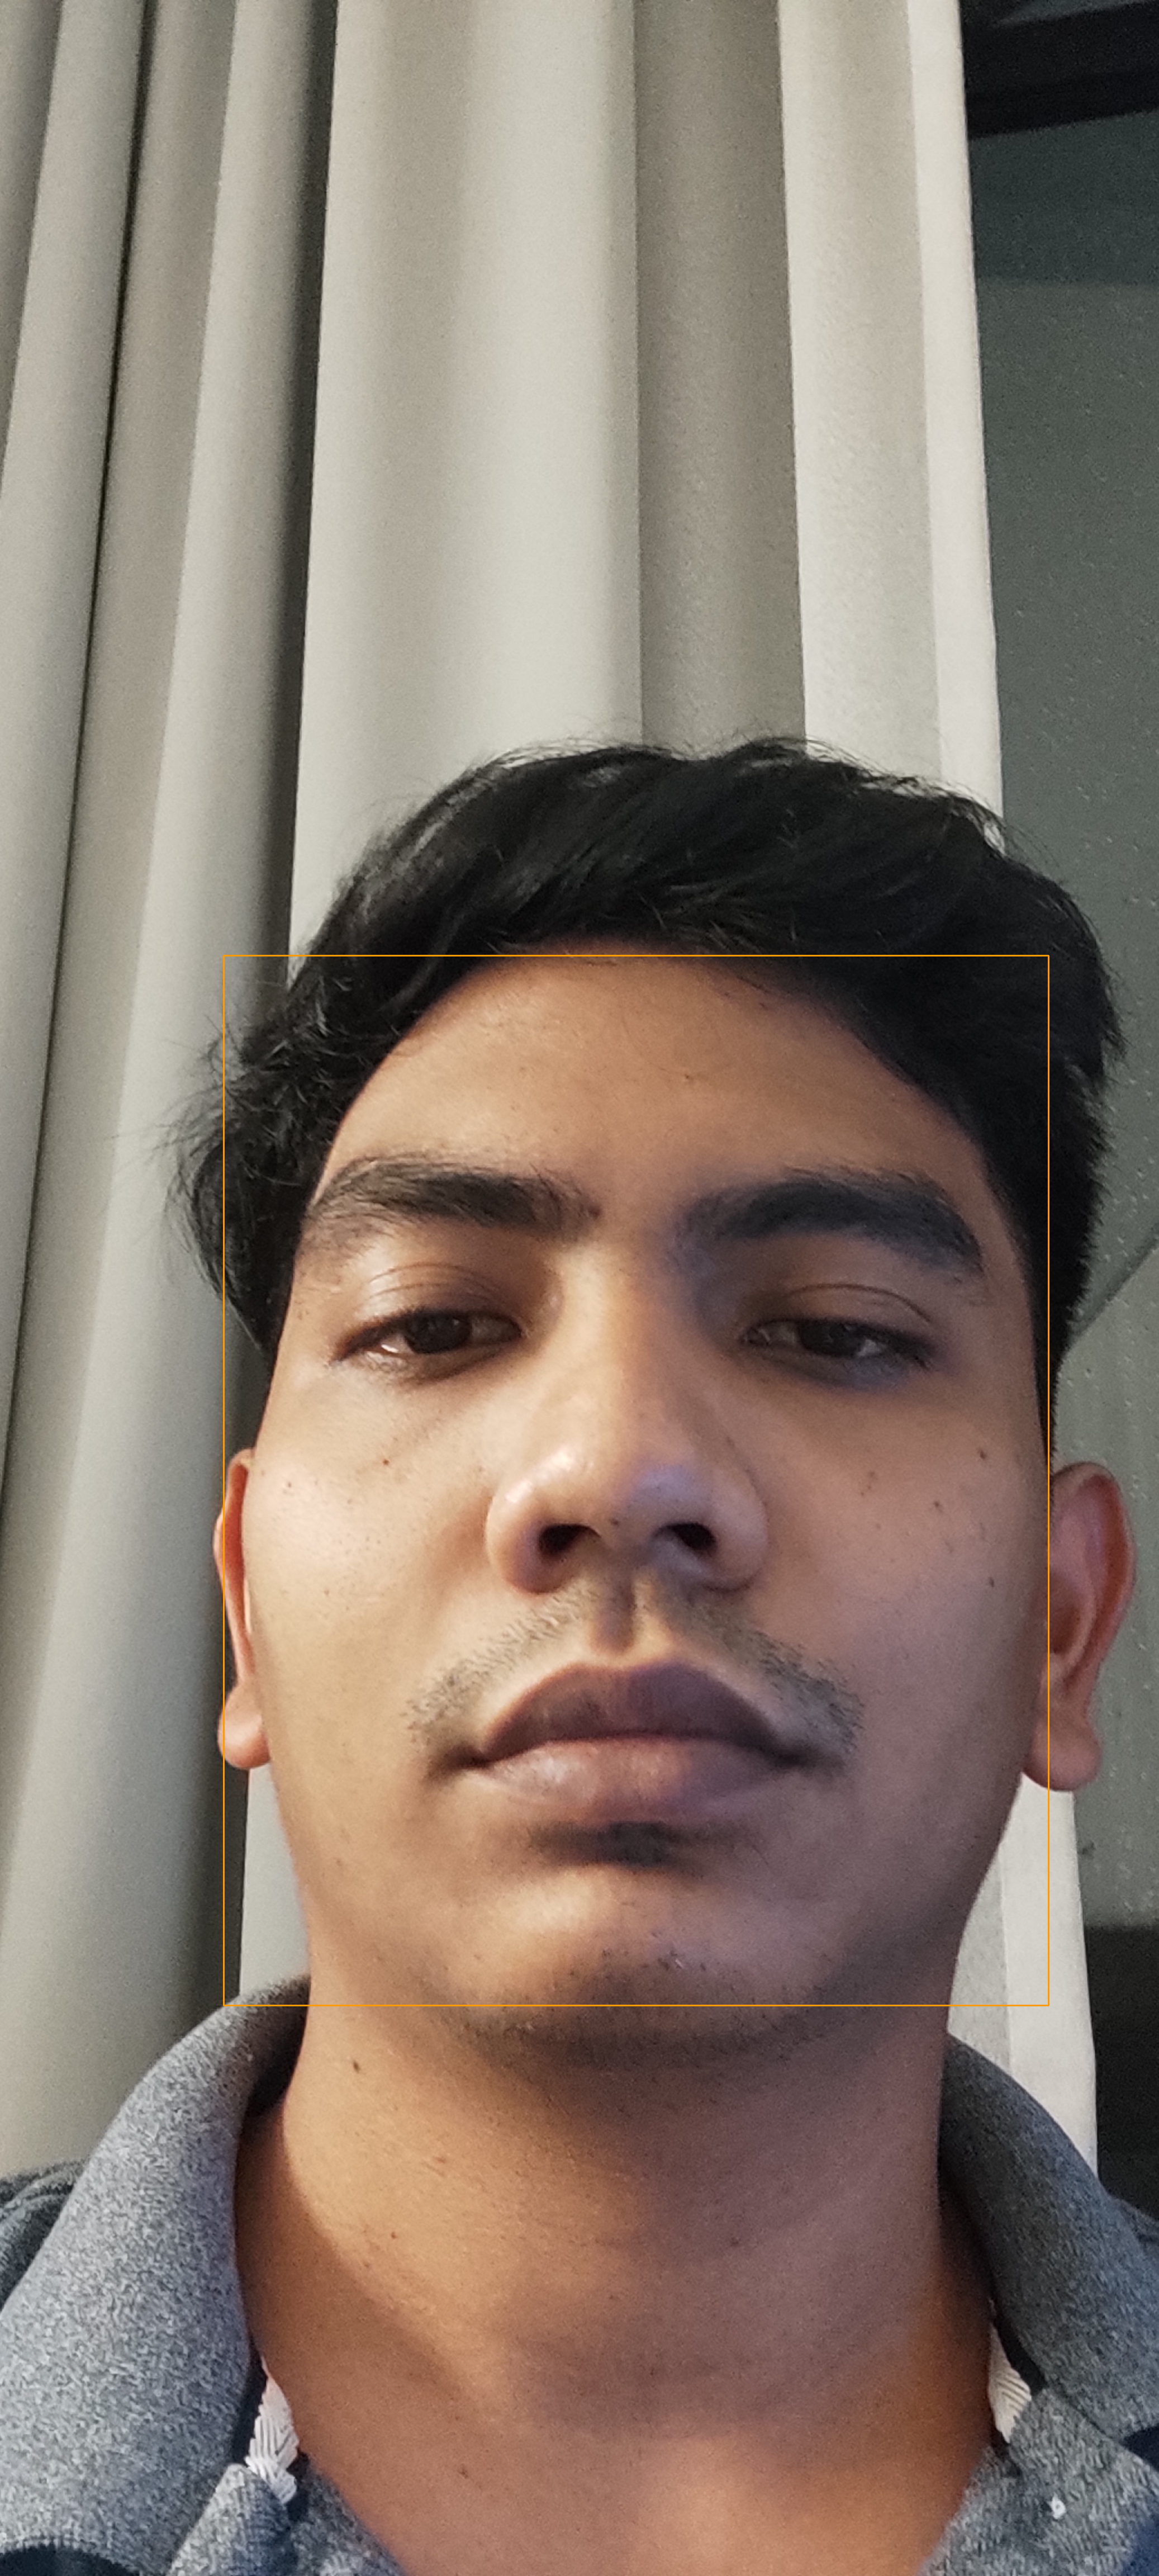

In [ ]:
## check another image

marked_image = create_bbox(cv2.imread('/content/sample_data/face recog images/akmal2.jpg'))
cv2_imshow(marked_image)

In [ ]:
## function to extract bounding box region for face verification
## VGG model is developed on 224 by 224 size. Therefore, need to resize

def extract_face(image, resize=(224, 224)):
  image=cv2.imread(image)

  faces = detector.detect_faces(image)
  x1, y1, width, height = faces[0]['box']
  x2, y2 = x1 + width, y1 + height

  face_boundary = image[y1:y2, x1:x2]

  face_image = cv2.resize(face_boundary, resize)

  return face_image

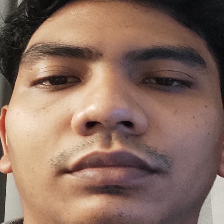

In [ ]:
face_image = extract_face('/content/sample_data/face recog images/akmal2.jpg')
cv2_imshow(face_image)

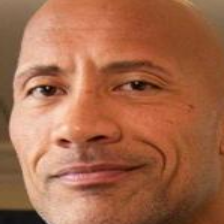

In [ ]:
## another person from another image
face_image = extract_face('/content/sample_data/face recog images/therock1.jpg')
cv2_imshow(face_image)

In [ ]:
## embeddings function to extract features of the face

def get_embeddings(faces):
  face = np.asarray(faces, 'float32')

  face = preprocess_input(face, version=2)

  model = VGGFace(model='resnet50' , include_top=False, input_shape=(224, 224, 3), pooling='avg')

  return model.predict(face)


In [ ]:
## create similarity function
## embeddings 0 & 1 is from two different images to make comparison
## comparing cosine distance vectors 

def get_similarity(faces):
  embeddings = get_embeddings(faces)

  score = cosine(embeddings[0], embeddings[1])
  print(embeddings[0])

  if score <= 0.5:
    return "Face Matched", (score * 100) 

  return "Face Not Match", (score * 100)

Cannot convert cosine score into percent directly. Score is aiming for small number. So, high percent match is still low score. Therefore, below arguement does not stand.

Maybe need to create function percent inside the score.

In [ ]:
## comparing the same person 1

faces = [extract_face(image) for image in ['/content/sample_data/face recog images/akmal1.JPG', '/content/sample_data/face recog images/akmal2.jpg']]

In [ ]:
get_similarity(faces)

[ 0.         12.404943    0.07812051 ...  0.01953594  0.09576156
  0.09800795]


('Face Matched', 34.49229598045349)

In [ ]:
## comparing the same person 2

faces2 = [extract_face(image) for image in ['/content/sample_data/face recog images/therock1.jpg', '/content/sample_data/face recog images/therock2.jpg']]

In [ ]:
get_similarity(faces2)

[0.        2.563383  3.4210482 ... 2.3102155 1.2282492 0.1669009]


('Face Matched', 17.212402820587158)

In [ ]:
## Akmal vs The Rock

faces3 = [extract_face(image) for image in ['/content/sample_data/face recog images/akmal2.jpg', '/content/sample_data/face recog images/therock1.jpg']]

In [ ]:
get_similarity(faces3)

[0.        2.897107  0.        ... 2.4168856 0.        0.       ]


('Face Not Match', 68.25973689556122)

Akmal's face does not match with The Rock with 68% confidence


In [ ]:
## Akmal vs Tom Shelby

faces4 = [extract_face(image) for image in ['/content/sample_data/face recog images/akmal1.JPG', '/content/sample_data/face recog images/tomshelby1.jpg']]
get_similarity(faces4)

[ 0.         12.404943    0.07812051 ...  0.01953594  0.09576156
  0.09800795]


('Face Not Match', 71.52068316936493)

Akmal's face does not match with Tom Shelby with 70% confidence

---



---

